In [92]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


In [93]:

# Step 2: Load the data
train_df = pd.read_csv('data/train_energy.csv')
test_df = pd.read_csv('data/test_energy.csv')

# Step 3: Convert DateTime to datetime object
train_df['DateTime'] = pd.to_datetime(train_df['DateTime'])
test_df['DateTime'] = pd.to_datetime(test_df['DateTime'])


In [94]:

# Step 4: Set DateTime as index
train_df.set_index('DateTime', inplace=True)
test_df.set_index('DateTime', inplace=True)


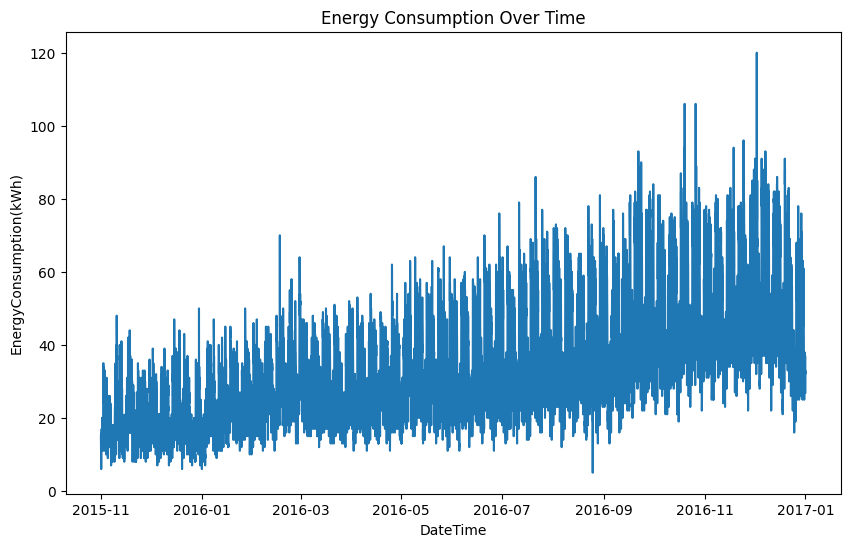

In [95]:

# Step 5: Plot the training data
plt.figure(figsize=(10, 6))
plt.plot(train_df['EnergyConsumption(kWh)'])
plt.title('Energy Consumption Over Time')
plt.xlabel('DateTime')
plt.ylabel('EnergyConsumption(kWh)')
plt.show()


In [96]:

# Step 6: Split the training data into train and validation sets
train_size = int(len(train_df) * 0.8)
train, val = train_df.iloc[:train_size], train_df.iloc[train_size:]


In [97]:

# Step 7: Fit the ARIMA model
# Note: You may need to experiment with the order (p, d, q) to get the best model
model = ARIMA(train['EnergyConsumption(kWh)'], order=(2, 0, 3))
model_fit = model.fit()


/home/adel_hb/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/adel_hb/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/adel_hb/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


In [98]:

# Step 8: Make predictions on the validation set
val_predictions = model_fit.forecast(steps=len(val))
val['Predictions'] = val_predictions


/tmp/ipykernel_77824/675761794.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['Predictions'] = val_predictions


In [99]:

# Step 9: Calculate RMSE on the validation set
rmse = sqrt(mean_squared_error(val['EnergyConsumption(kWh)'], val['Predictions']))
print(f'Validation RMSE: {rmse}')


Validation RMSE: 25.931718699398893


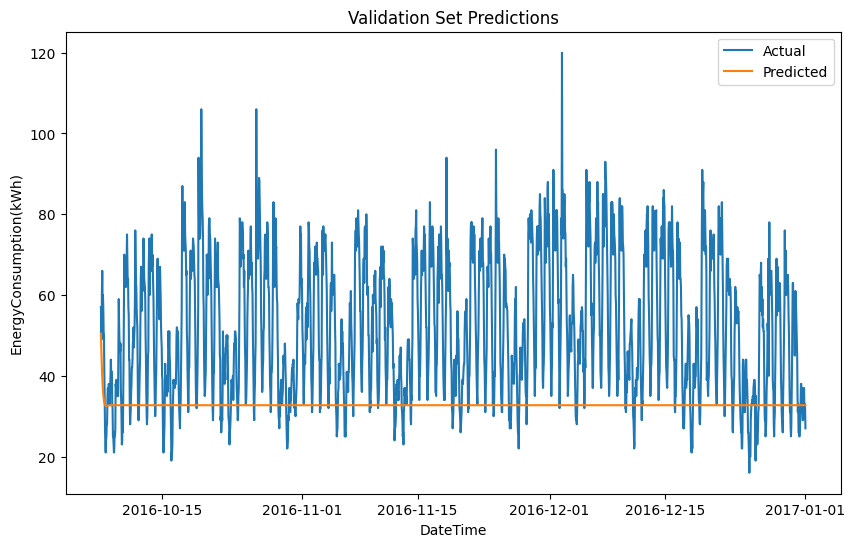

In [100]:

# Step 10: Plot the validation predictions
plt.figure(figsize=(10, 6))
plt.plot(val['EnergyConsumption(kWh)'], label='Actual')
plt.plot(val['Predictions'], label='Predicted')
plt.title('Validation Set Predictions')
plt.xlabel('DateTime')
plt.ylabel('EnergyConsumption(kWh)')
plt.legend()
plt.show()


In [101]:

# Step 11: Fit the ARIMA model on the entire training data
final_model = ARIMA(train_df['EnergyConsumption(kWh)'], order=(2, 0, 3))
final_model_fit = final_model.fit()


/home/adel_hb/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/adel_hb/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/adel_hb/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


In [102]:

# Step 12: Make predictions on the test set
test_predictions = final_model_fit.forecast(steps=len(test_df))
test_df['EnergyConsumption(kWh)'] = test_predictions


In [103]:

# Step 13: Prepare the submission file
submission_df = test_df.reset_index()[['DateTime', 'EnergyConsumption(kWh)']]
submission_df.to_csv('arima_submission.csv', index=False)